In [70]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from xgboost import XGBClassifier

In [71]:
data = pd.read_csv(r"C:\Users\karem\OneDrive\Desktop\Cellula Technologies\TASKS\Task1\first inten project.csv") 
data.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [73]:
data[data.duplicated() == True]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status


In [74]:
eror = data['date of reservation'].str.find("-")
eror = data.iloc[(eror[eror != -1]).index,15]
print(eror)
print("\n________________________________________________\n\n 2018-2-29 this day did not exist in reality. ")

2626     2018-2-29
3677     2018-2-29
5600     2018-2-29
6343     2018-2-29
7648     2018-2-29
8000     2018-2-29
8989     2018-2-29
9153     2018-2-29
9245     2018-2-29
9664     2018-2-29
9934     2018-2-29
10593    2018-2-29
10652    2018-2-29
10747    2018-2-29
11881    2018-2-29
13958    2018-2-29
14304    2018-2-29
15363    2018-2-29
15438    2018-2-29
17202    2018-2-29
18380    2018-2-29
18534    2018-2-29
18680    2018-2-29
19013    2018-2-29
20419    2018-2-29
21674    2018-2-29
21688    2018-2-29
26108    2018-2-29
27559    2018-2-29
27928    2018-2-29
30552    2018-2-29
30616    2018-2-29
30632    2018-2-29
30839    2018-2-29
32041    2018-2-29
34638    2018-2-29
35481    2018-2-29
Name: date of reservation, dtype: object

________________________________________________

 2018-2-29 this day did not exist in reality. 


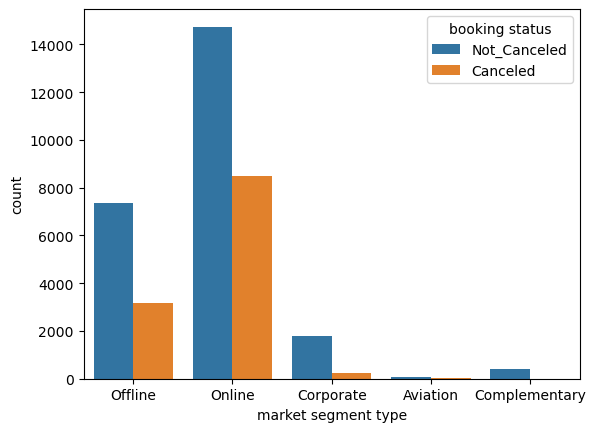

In [75]:
sns.countplot(data=data, x='market segment type', hue='booking status')
plt.show()

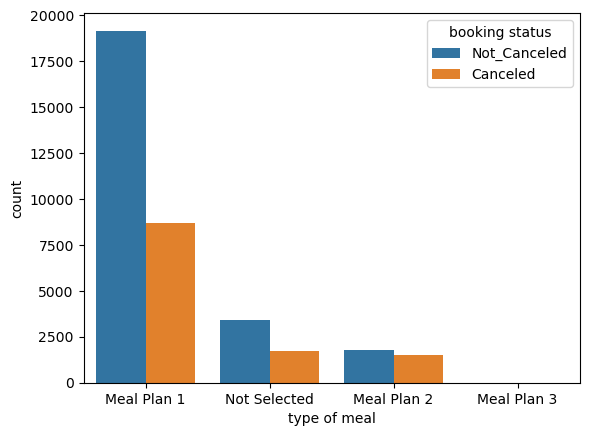

In [76]:
sns.countplot(data=data, x='type of meal', hue='booking status')
plt.show()

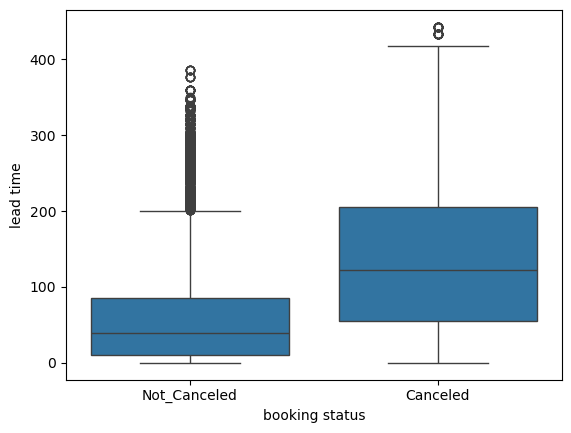

In [77]:
sns.boxplot(data=data, x='booking status', y='lead time')
plt.show()

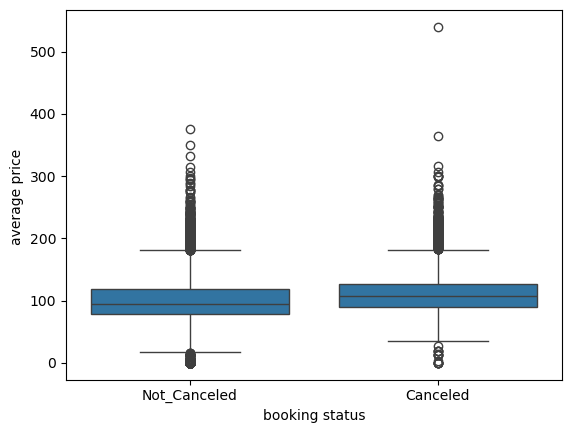

In [78]:
sns.boxplot(data=data, x='booking status', y='average price ')
plt.show()

In [79]:
data['type of meal'] = data["type of meal"].replace({"Meal Plan 1" : "1" , "Not Selected" : "0" , "Meal Plan 2" : "2" 
                                                     , "Meal Plan 3" : "3"})  
data["room type"] = data['room type'].replace({"Room_Type 1" : "1" , "Room_Type 2" : "2" ,"Room_Type 3" : "3" ,
                                            "Room_Type 4" : "4" , "Room_Type 5" : "5" , "Room_Type 6" : "6" , "Room_Type 7" : "7"})
data['type of meal'] = data["type of meal"].astype("int8")
data['room type'] = data["room type"].astype("int8")

In [80]:
le = LabelEncoder()
data['market segment type'] = le.fit_transform(data['market segment type'])
data['booking status'] = le.fit_transform(data['booking status'])
data.drop(['Booking_ID',"date of reservation"] , inplace= True ,axis= 1)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  int8   
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  int8   
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  int32  
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  bookin

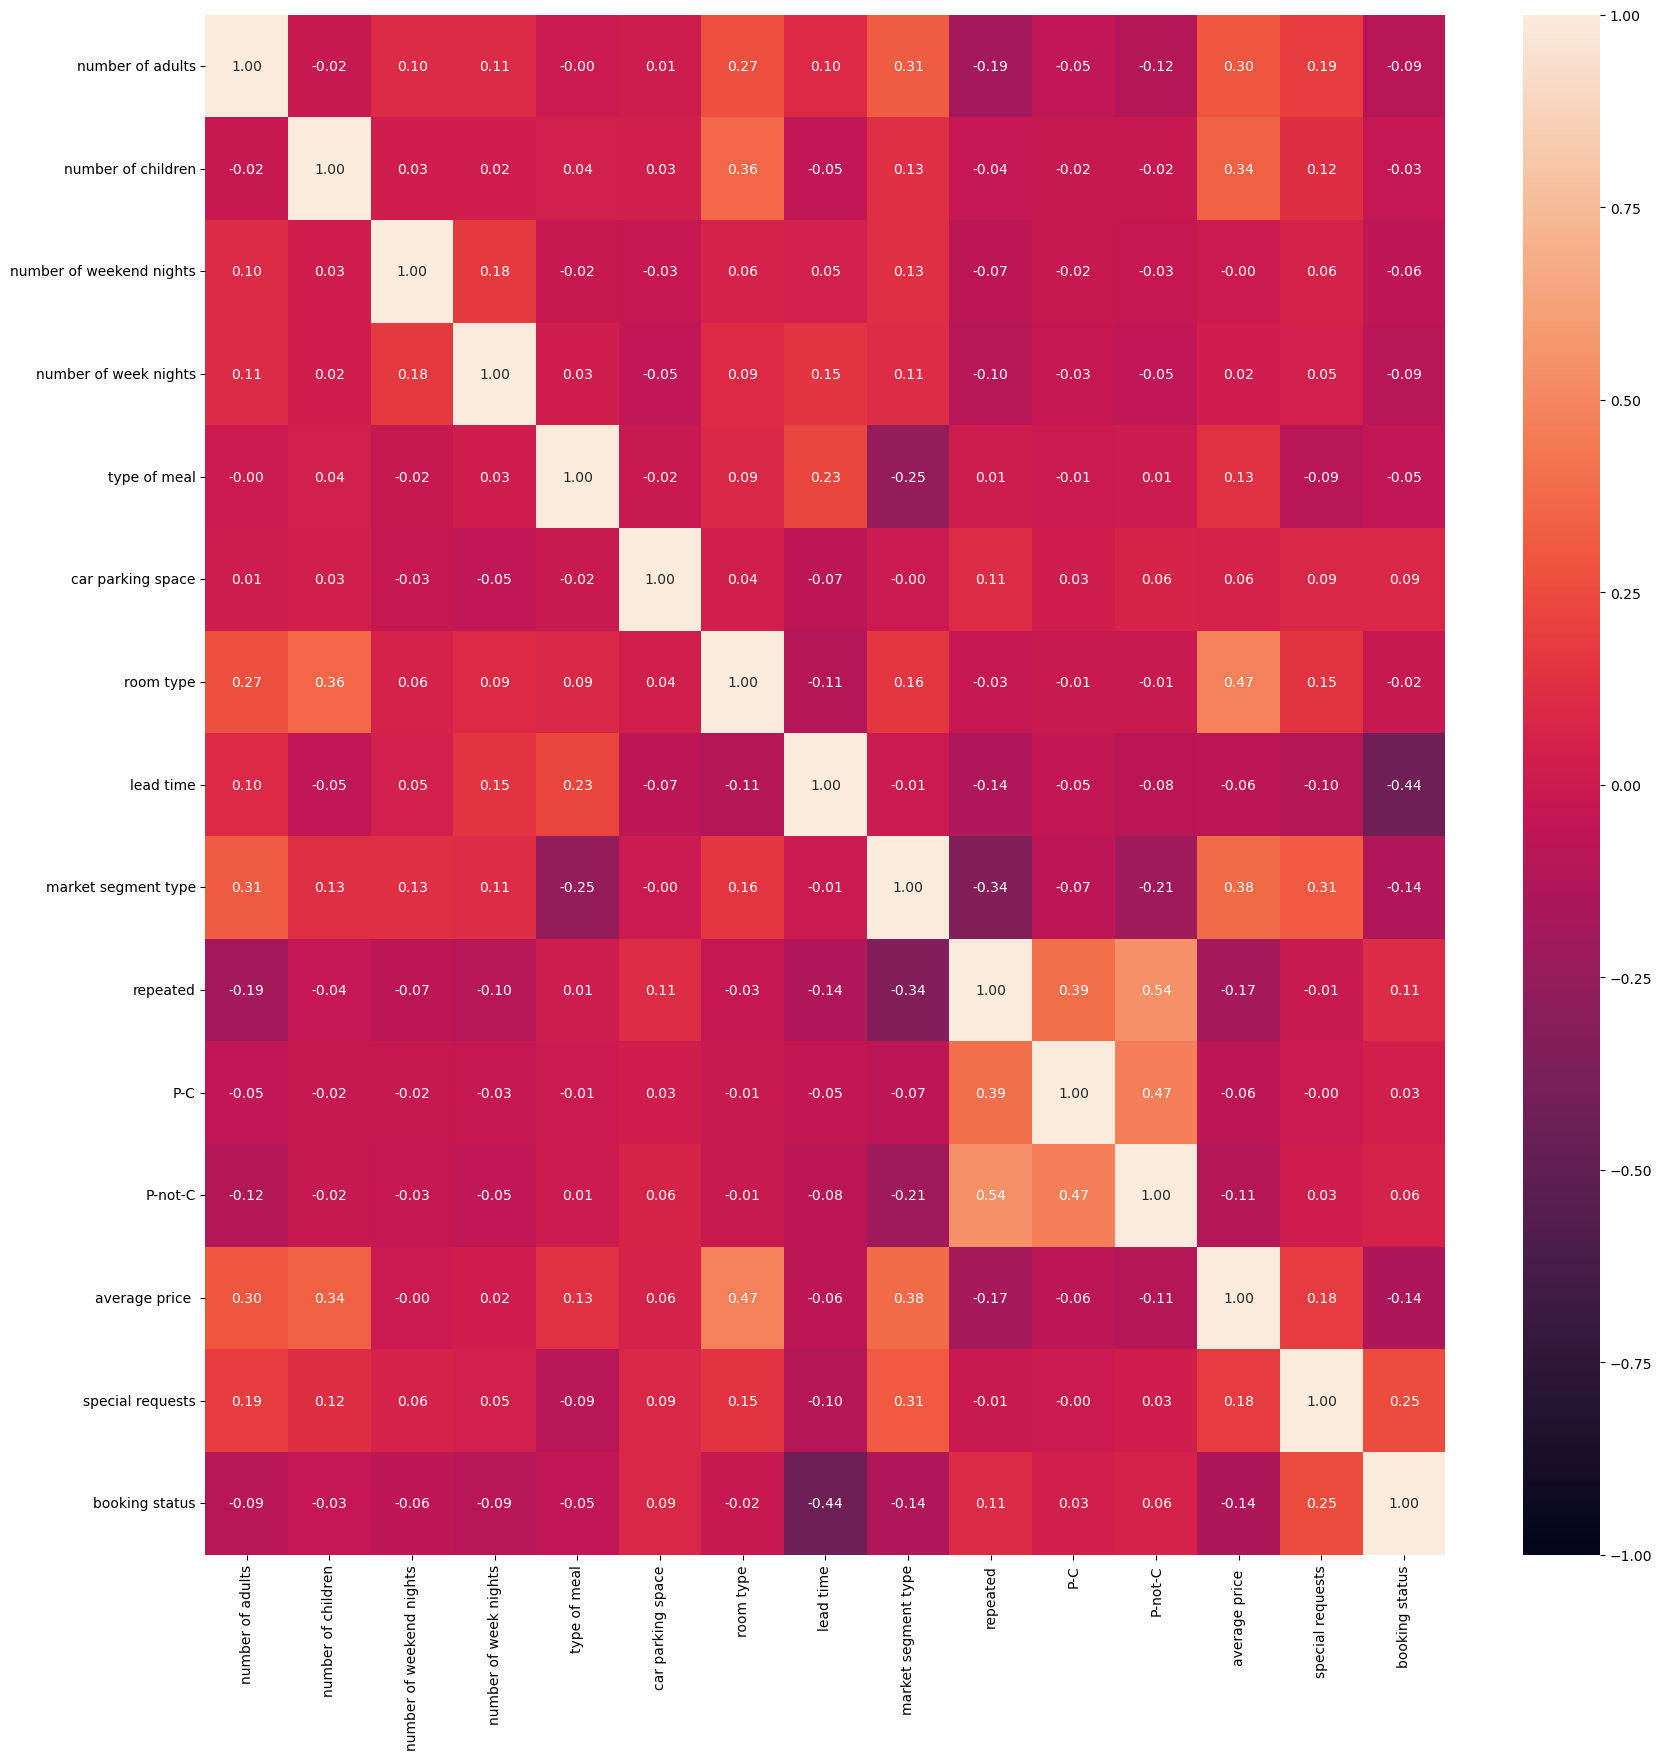

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr() ,vmax=1,vmin=-1,annot=True , fmt=".2f")
plt.show()

In [83]:
data_traning =  data.loc[ :,[ 'type of meal','repeated','lead time', 'market segment type', 'average price ', 'special requests']]
targetcolum = data['booking status']
data_traning

,type of meal,repeated,lead time,market segment type,average price,special requests
0,1,0,224,3,88.00,0
1,0,0,5,4,106.68,1
2,1,0,1,4,50.00,0
3,1,0,211,4,100.00,1
4,0,0,48,4,77.00,0
...,...,...,...,...,...,...
36280,2,0,346,4,115.00,1
36281,1,0,34,4,107.55,1
36282,1,0,83,4,105.61,1
36283,1,0,121,3,96.90,1


In [84]:
X_train, X_test, y_train, y_test = train_test_split(data_traning, targetcolum, test_size=0.2, random_state=42)

In [85]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
y_pred = model.predict(X_test)
report = accuracy_score(y_test, y_pred )
print(confusion_matrix(y_test, y_pred))

[[1589  813]
 [ 507 4348]]


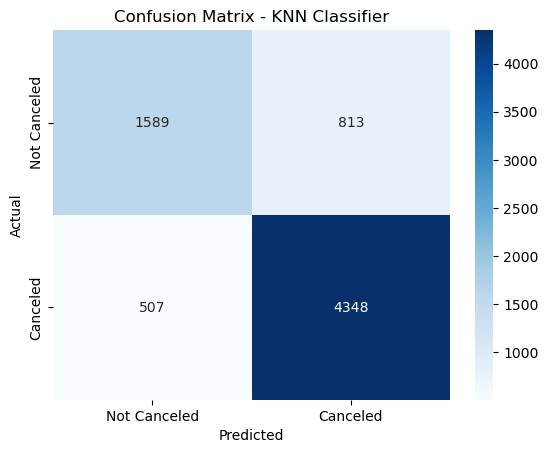

In [87]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',xticklabels=['Not Canceled', 'Canceled'],yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

In [88]:
report = accuracy_score(y_test, y_pred )
print(report)
report = classification_report(y_test,y_pred)
print("\n\n", report)

0.8181066556428276


               precision    recall  f1-score   support

           0       0.76      0.66      0.71      2402
           1       0.84      0.90      0.87      4855

    accuracy                           0.82      7257
   macro avg       0.80      0.78      0.79      7257
weighted avg       0.81      0.82      0.81      7257



In [89]:
import joblib
joblib.dump(model, 'knn_model.pkl')

['knn_model.pkl']

In [90]:
scaler = MinMaxScaler()
data_traning[["average price ", "lead time"]] = scaler.fit_transform(data_traning.loc[ :, ['average price ',"lead time"]])
data_traning

,type of meal,repeated,lead time,market segment type,average price,special requests
0,1,0,0.505643,3,0.162963,0
1,0,0,0.011287,4,0.197556,1
2,1,0,0.002257,4,0.092593,0
3,1,0,0.476298,4,0.185185,1
4,0,0,0.108352,4,0.142593,0
...,...,...,...,...,...,...
36280,2,0,0.781038,4,0.212963,1
36281,1,0,0.076749,4,0.199167,1
36282,1,0,0.187359,4,0.195574,1
36283,1,0,0.273138,3,0.179444,1


In [91]:
X_train, X_test, y_train, y_test = train_test_split(data_traning, targetcolum, test_size=0.2, random_state=42)
model = LogisticRegression()  
model.fit(X_train, y_train)

LogisticRegression()

In [92]:
y_pred = model.predict(X_test)

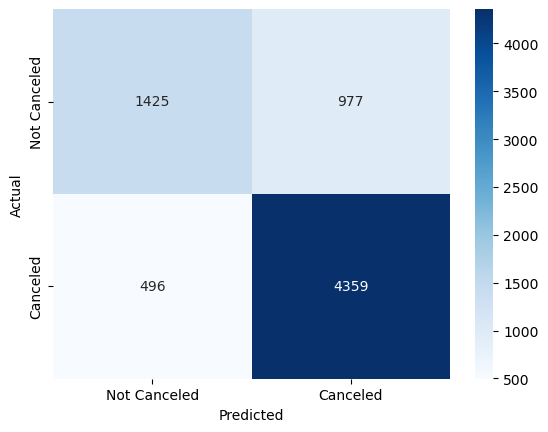

In [93]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',xticklabels=['Not Canceled', 'Canceled'],yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [94]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7970235634559736
              precision    recall  f1-score   support

           0       0.74      0.59      0.66      2402
           1       0.82      0.90      0.86      4855

    accuracy                           0.80      7257
   macro avg       0.78      0.75      0.76      7257
weighted avg       0.79      0.80      0.79      7257



In [95]:
import joblib
joblib.dump(model, 'LogisticRegression.pkl')

['LogisticRegression.pkl']

In [96]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

c:\Users\karem\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:02:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [97]:
y_pred = model.predict(X_test)

In [98]:
print('Accuracy:', accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy: 0.869229709246245
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      2402
           1       0.88      0.93      0.90      4855

    accuracy                           0.87      7257
   macro avg       0.86      0.84      0.85      7257
weighted avg       0.87      0.87      0.87      7257



In [99]:
import joblib
joblib.dump(model , 'XGBClassifier.pkl')

['XGBClassifier.pkl']

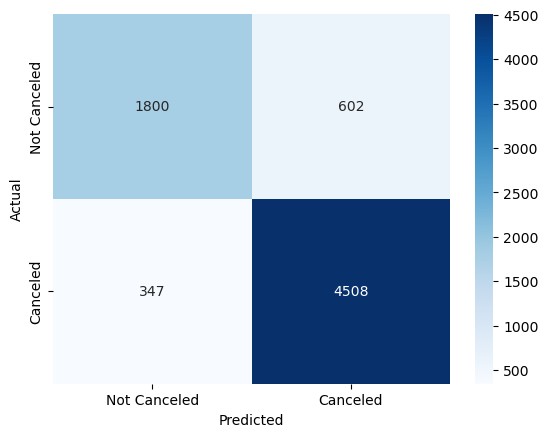

In [100]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',xticklabels=['Not Canceled', 'Canceled'],yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()